In [11]:
import itertools
import os
from pathlib import Path

import numpy as np
import pandas as pd
import imagehash
import skimage
from PIL import Image, UnidentifiedImageError
from tqdm.auto import tqdm as tn

from pandarallel import pandarallel


tn.pandas()
pandarallel.initialize(progress_bar=True, nb_workers=os.cpu_count())

INFO: Pandarallel will run on 64 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [17]:

DATA_PATH = Path("data")
COMP_DATA_PATH = Path("data")
IMAGE_PATH = Path("dataset")

TEST_SET = COMP_DATA_PATH / "test-data.csv"
TRAIN_SPLIT = DATA_PATH / "train_split_20perval_grouped_stratified.csv"
VAL_SPLIT = DATA_PATH / "val_split_20perval_grouped_stratified.csv"

IMG_GLOB = "images_*_unpadded/*.jpg"

In [18]:
def bind_fs(df, path: Path, glob: str):
    mapping = {x.name: x for x in path.glob(glob)}
    return df.applymap(lambda x: mapping.get(x))

In [20]:
df = pd.read_csv("boosting_val_pred.csv", index_col=0)
df[["image_path1", "image_path2"]] = bind_fs(df.filter(like="image_url"), IMAGE_PATH, IMG_GLOB)
df["predict_label"] = (df["predict"] > 0.3).astype(int)


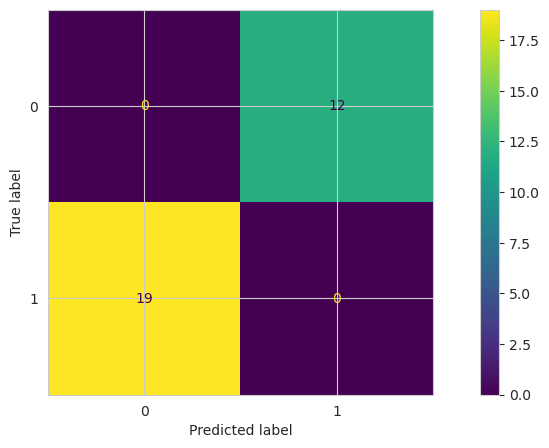

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

errdf2 = errdf.drop(errdf.iloc[[8, 9, 10, 14]].index)

cm = confusion_matrix(errdf2["is_same"], errdf2["predict_label"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

In [26]:
errdf = df[df["is_same"] != df["predict_label"]]

In [31]:
from IPython.display import display


def show_image(path):
    try:
        display(Image.open(path))
    except UnidentifiedImageError:
        return None

In [ ]:
[8, 9, 10, 14]

Text(0.5, 0.98, 'True label is 1, predicted 0')

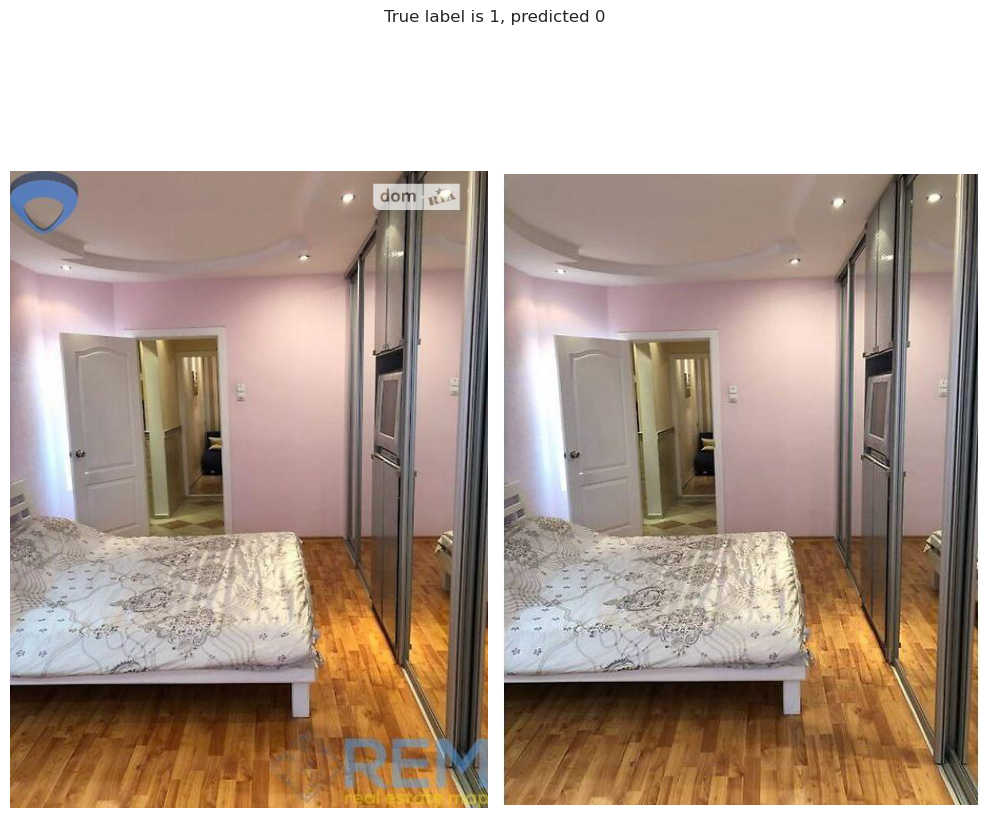

In [83]:
row = errdf.iloc[34]
img1 = Image.open(row["image_path1"])
img2 = Image.open(row["image_path2"])
display_side_by_side(img1, img2)
plt.tight_layout()
plt.suptitle("True label is {}, predicted {}".format(row["is_same"], row["predict_label"]))

In [76]:
row

image_url1                                        928531529.jpg
image_url2                                        933563770.jpg
is_same                                                       0
image_path1         dataset/images_train_unpadded/928531529.jpg
image_path2         dataset/images_train_unpadded/933563770.jpg
ahash_16                                                     30
phash_16_8                                                  110
phash                                                       110
dhash_verical_16                                             40
dhash_16                                                     78
colorhash_21                                                 18
colorhash_33                                                 35
colorhash_63                                                 56
colorhash_123                                                89
whash_16_haar                                                38
whash_16_db4                            